## 3- Tracking Training Progress

Now it's time to use the information stored on DataJoint to track animal training progress. In this notebook I'll show you how I visualize training progress for my animals.

Written by Jess Breda February 2023

### 1. Libraries

In [1]:
import seaborn as sns

from pd_to_df import fetch_latest_training_data
from plotting_utils import *

sns.set_context("talk")
%load_ext autoreload
%autoreload 2

### 2. Fetch trial data

Like I mentioned in notebook 2, there are some functions in `pd_to_df.py` that I use to format my data into a pandas dataframe. Lets fetch all the training data for `R502`.

In [2]:
animal_id = ["R502"]

pd_df = fetch_latest_training_data(animal_id)

[2023-02-19 19:44:22,083][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2023-02-19 19:44:22,649][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


fetched 189 sessions for R502 with latest date 2023-02-19


In [3]:
pd_df.head()

,trial,animal_id,date,sess_id,hits,violations,temperror,sides,result,sa,sb,delay,fixation,timeouts,helper,stage,is_match,sound_pair
0,1,R502,2022-07-19,879475,0,0,1,r,4,3.0,12.0,0.1,1.1,0.1,0,1,False,"3.0, 12.0"
1,2,R502,2022-07-19,879475,1,0,0,r,1,3.0,12.0,0.1,0.5,NaN,0,1,False,"3.0, 12.0"
2,3,R502,2022-07-19,879475,0,0,1,r,4,3.0,12.0,0.1,0.5,0.1,0,1,False,"3.0, 12.0"
3,4,R502,2022-07-19,879475,1,0,0,l,1,3.0,3.0,0.1,0.5,NaN,0,1,True,"3.0, 3.0"
4,5,R502,2022-07-19,879475,1,0,0,r,1,3.0,12.0,0.1,0.5,NaN,0,1,False,"3.0, 12.0"


I could plot all the data over time, but instead I'm going to filter the FataFrame to just be the last 20 days for cleaner plots.

In [4]:
pd_df = filter_for_date_window(pd_df, latest_date=None, n_days_back=20)

### 3. Performance plots

#### 3.0 Task Overview

Tone frequency delayed match to sample (DMS) task.
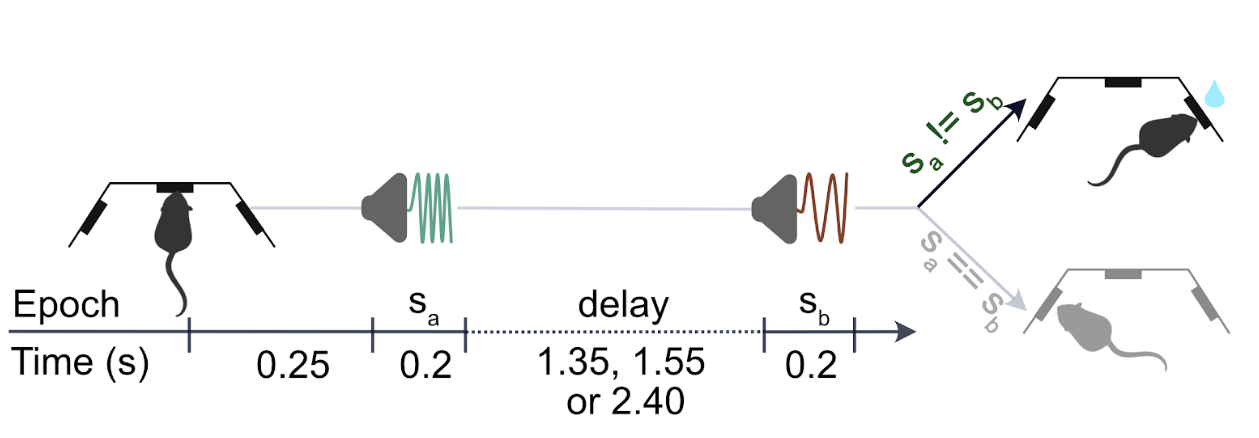

#### 3.1 N Trials 

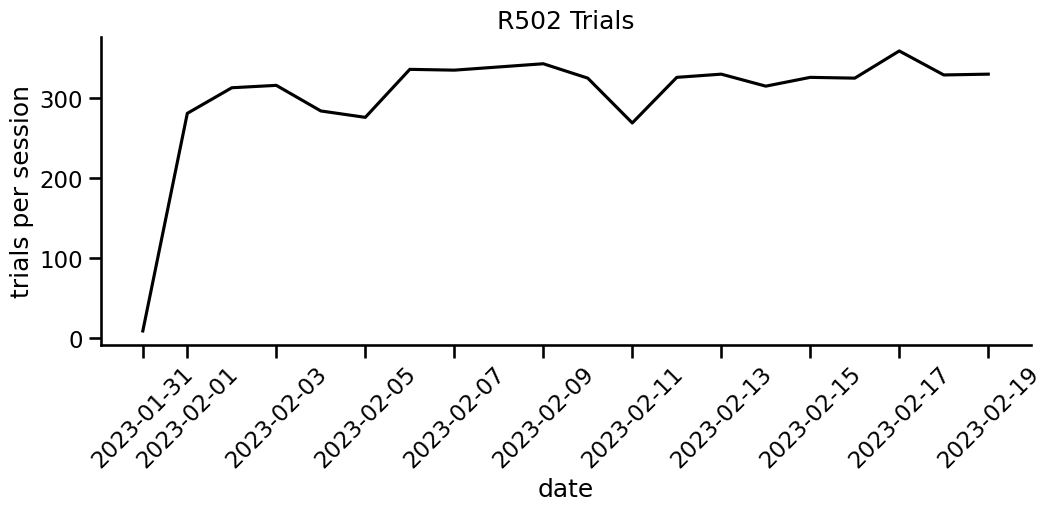

In [5]:
fig,ax = plt.subplots(1,1, figsize=(12,4))

plot_trials(pd_df, ax, title="R502 Trials", color="k")

#### 3.2 Hits & Violations

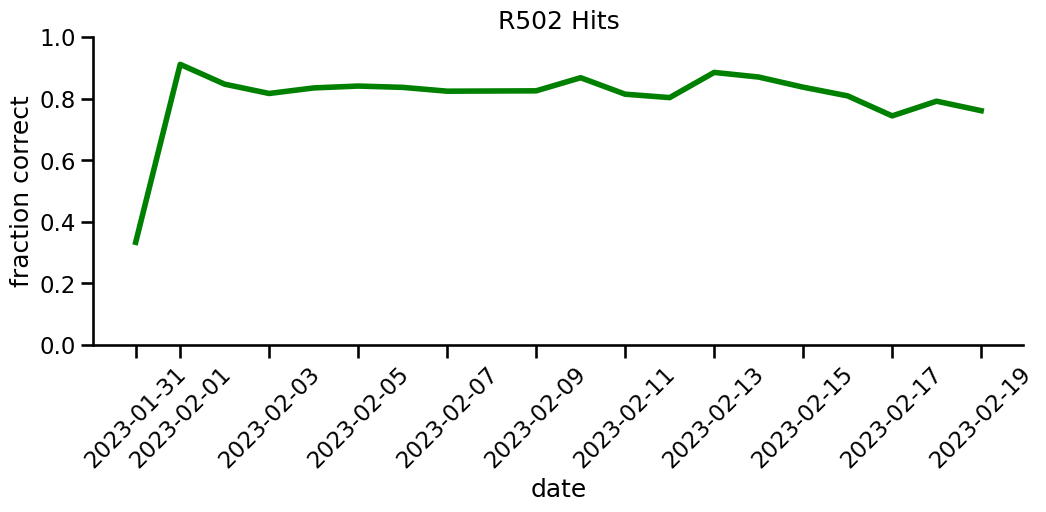

In [5]:
fig,ax = plt.subplots(1,1, figsize=(12,4))
                                        # example kwargs
plot_hits(pd_df, ax, title="R502 Hits", color="green", lw="4")


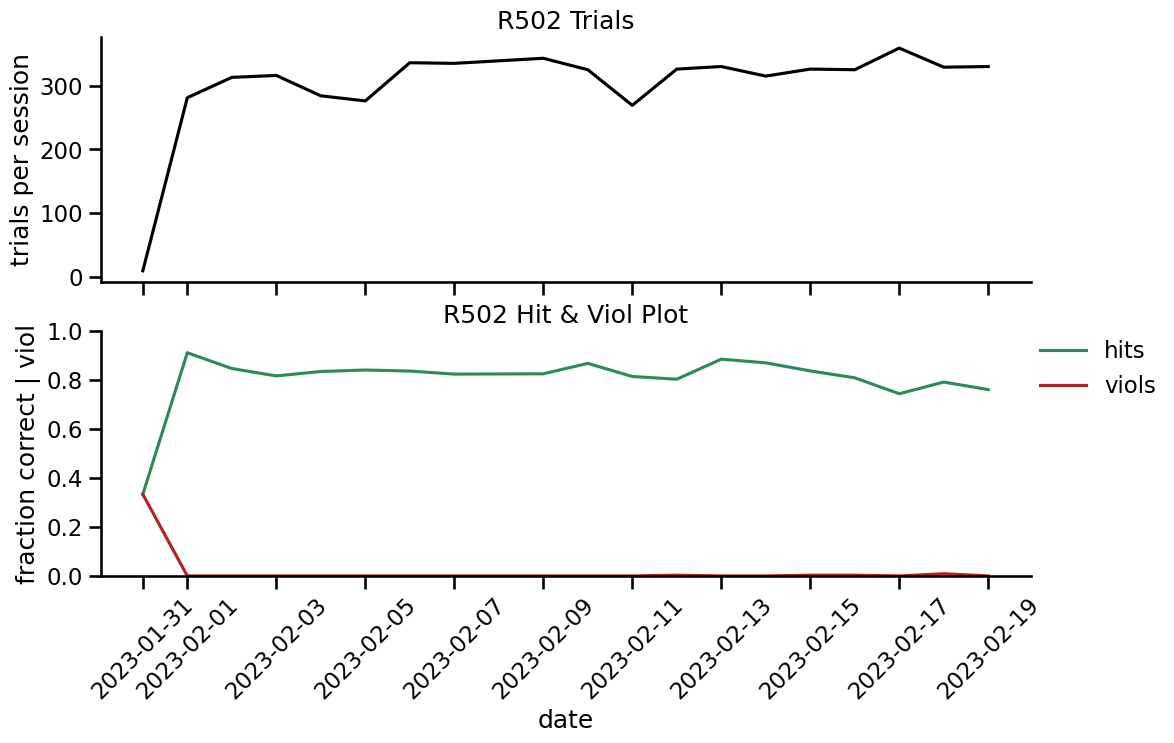

In [6]:
fig,ax = plt.subplots(2,1, figsize=(12,7), sharex=True)

plot_trials(pd_df, ax[0], title="R502 Trials", color="k")
plot_hits_and_viols(pd_df, ax[1], title="R502 Hit & Viol Plot")

#### 3.3 Side Bias

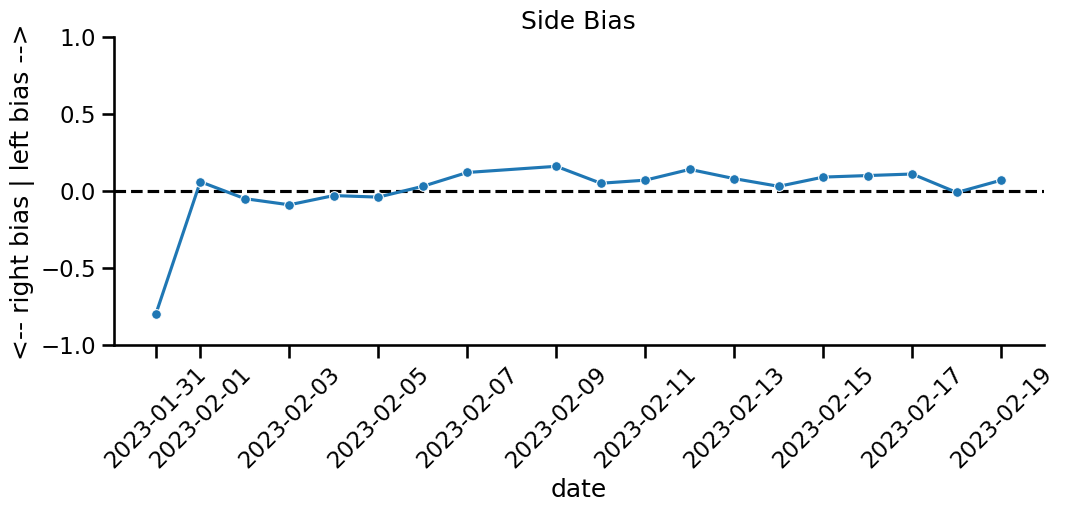

In [7]:
fig,ax = plt.subplots(1,1, figsize=(12,4))

_ = plot_bias_history(pd_df, ax)

#### 3.4 Performance by stimulus type

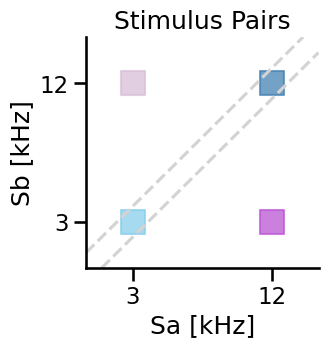

In [8]:
fig,ax = plt.subplots(1,1, figsize=(3,3))

# plot the most recent stimulus set used
plot_stim_in_use(pd_df, ax)

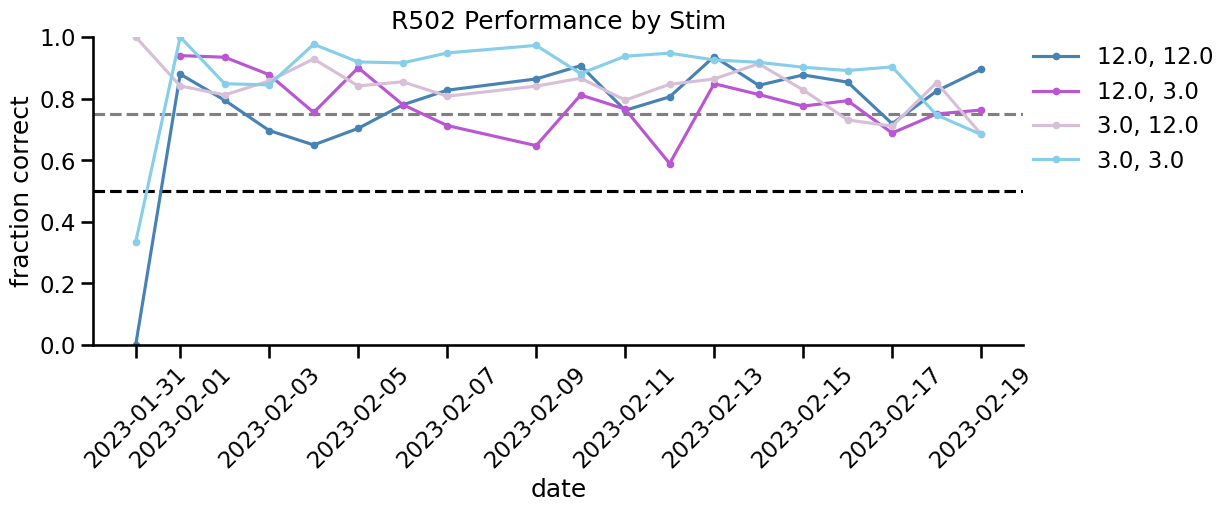

In [9]:
fig,ax = plt.subplots(1,1, figsize=(12,4))

plot_pair_performance(pd_df, ax, title="R502 Performance by Stim")
